In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset/Sales_August_2019.csv
/kaggle/input/sales-dataset/Sales_May_2019.csv
/kaggle/input/sales-dataset/all_data.csv
/kaggle/input/sales-dataset/Sales_February_2019.csv
/kaggle/input/sales-dataset/Sales_November_2019.csv
/kaggle/input/sales-dataset/Sales_January_2019.csv
/kaggle/input/sales-dataset/Sales_March_2019.csv
/kaggle/input/sales-dataset/Sales_September_2019.csv
/kaggle/input/sales-dataset/Sales_April_2019.csv
/kaggle/input/sales-dataset/Sales_July_2019.csv
/kaggle/input/sales-dataset/Sales_October_2019.csv
/kaggle/input/sales-dataset/Sales_June_2019.csv
/kaggle/input/sales-dataset/Sales_December_2019.csv


In [2]:
data = pd.read_csv('/kaggle/input/sales-dataset/all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
data = data.dropna()
data.shape

(186305, 6)

In [6]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
def month(x):
    return x.split('/')[0]

In [8]:
data['month'] = data['Order Date'].apply(month)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
month               0
dtype: int64

In [10]:
filter = data['month']=='Order Date'
all_data = data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:
all_data['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [12]:
all_data['month'] = all_data['month'].astype(int)
all_data.dtypes

/tmp/ipykernel_20/157464822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month'] = all_data['month'].astype(int)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [13]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data.dtypes

/tmp/ipykernel_20/3406816685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)


Order ID            object
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [14]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data.dtypes

/tmp/ipykernel_20/1048694202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype(float)


Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

# Analyze Monthly Sales

In [15]:
all_data['sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

/tmp/ipykernel_20/571765315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['sales'] = all_data['Price Each'] * all_data['Quantity Ordered']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
all_data.groupby('month')['sales'].sum()

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

Text(0, 0.5, 'Sales in USD')

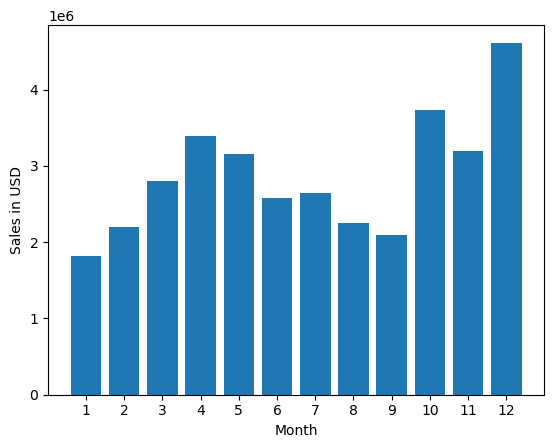

In [17]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months, all_data.groupby('month')['sales'].sum())
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')

# Analyzing Maximum Order & hour analysis

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
def city(x):
    return x.split(',')[1]

In [20]:
all_data['city'] = all_data['Purchase Address'].apply(city)
all_data.head()

/tmp/ipykernel_20/514418880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['city'] = all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [21]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

<Axes: xlabel='city'>

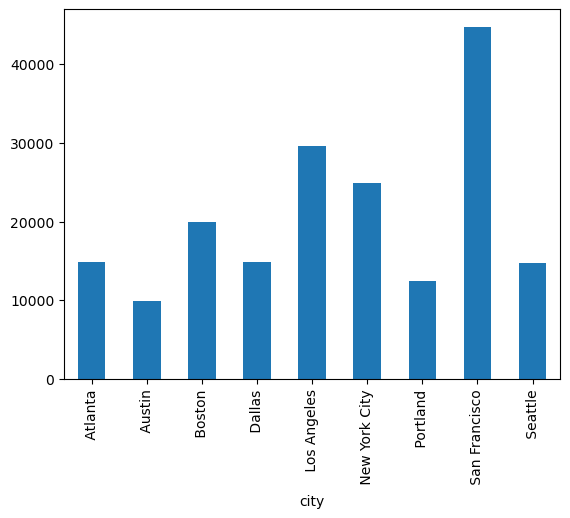

In [22]:
all_data.groupby('city')['city'].count().plot(kind='bar')

In [23]:
all_data['Order Date'].dtype

dtype('O')

In [24]:
all_data['hours'] = pd.to_datetime(all_data['Order Date']).dt.hour

/tmp/ipykernel_20/492633912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['hours'] = pd.to_datetime(all_data['Order Date']).dt.hour


In [25]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [26]:
keys=[]
hours=[]
for key, hour_df in all_data.groupby('hours'):
    keys.append(key)
    hours.append(len(hour_df))

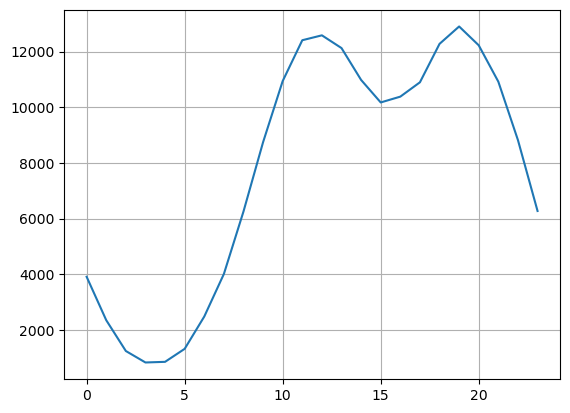

In [27]:
plt.grid()
plt.plot(keys, hours)